# Session 06: Winding Machine

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Addendum: Exponentialfunktion

In [2]:
np.exp(np.log(2) * 3)

7.999999999999998

$e^{\ln(2) \cdot x} = 2^x$

siehe auch: [Mathematik-Grundlagen](/topics/Mathematik-Grundlagen.md)

## Winding Machine

In [3]:
num_mags = 100
magnitudes = np.zeros(num_mags)

t = np.linspace(0, 1, num=100)
freq1, freq2 = 2, 5
x = (np.sin(t * 2 * np.pi * freq1) * 0.5) + (np.sin(t * 2 * np.pi * freq2) * 0.5)
# x = x * 0.2 + 0.6

winding_freqs = np.linspace(0, 7, num=num_mags)
for i, winding_freq in enumerate(winding_freqs):
    e = np.exp(t * -1j * 2 * np.pi * winding_freq)
    winded = x * e
    com = np.mean(winded) # center of mass
    magnitudes[i] = np.abs(com)

    
    ########################

    plt.figure(figsize=(5 * 3, 5))
    cm = plt.cm.get_cmap('viridis')

    plt.subplot(1, 3, 1)
    for winded_, color in zip(winded, cm(t)):
        plt.plot(winded_.real, winded_.imag, 'o', color=color)
    plt.plot([0, com.real], [0, com.imag], 'r')
    lim = 1.05
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)

    plt.subplot(1, 3, 2)
    plt.plot(x, '-o')
    plt.plot(np.cos(t * 2 * np.pi * winding_freq + np.angle(com)))
    plt.ylim(-lim, lim)

    plt.subplot(1, 3, 3)
    plt.plot(winding_freqs, magnitudes)

    plt.show()

![winding_machine](../../data/img/winding_machine.gif)

## Discrete Fourier Transform (DFT)

---
$X_{k}=\sum _{n=0}^{N-1}x_{n}\cdot e^{{\frac {-i 2 \pi k n}{N}}}$

---

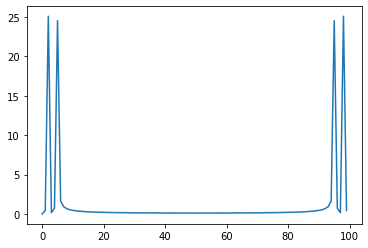

In [4]:
def own_dft(x):

    N = x.size
    n = np.arange(0, N)

    ft = np.zeros(N, dtype=complex)

    for k in range(N):
        ft[k] = np.sum(x * np.exp(-1j * 2 * np.pi * k * n / N))

    return ft

plt.plot(np.abs(own_dft(x)))